In [1]:
import numpy as np
import matplotlib.pyplot as plt

import einops

from sklearn.model_selection import train_test_split


In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport moving_dots

In [4]:
def split_and_save(X,y):
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        shuffle=True, 
                                                        stratify=y, 
                                                        random_state=42)
    # save
    np.save('X_train.npy', X_train)
    np.save('X_test.npy', X_test)
    np.save('y_train.npy', y_train)
    np.save('y_test.npy', y_test)
    

In [5]:
class_charas = [
    [1,1,1,1], 
    [2,2,2,2],
    [1,0,0,0],
    [2,0,0,0],
    [0,1,1,0],
    [0,2,2,0],
]

In [6]:
N = 10000 # size of each class

In [7]:
res = 13 # resolution = n_frames


In [8]:
# first
X = moving_dots.gen_class( class_charas[0], N ) 
y = np.full(N,0)

# rest
for i, chara in enumerate( class_charas[1:] ): 
        X_ = moving_dots.gen_class( chara, N ) 
        y_ = np.full(N,i+1)
              
        X = np.concatenate( ( X,X_ ), axis=0 )
        y = np.concatenate( ( y,y_ ), axis=0 )  

In [14]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([10000, 10000, 10000, 10000, 10000, 10000]))

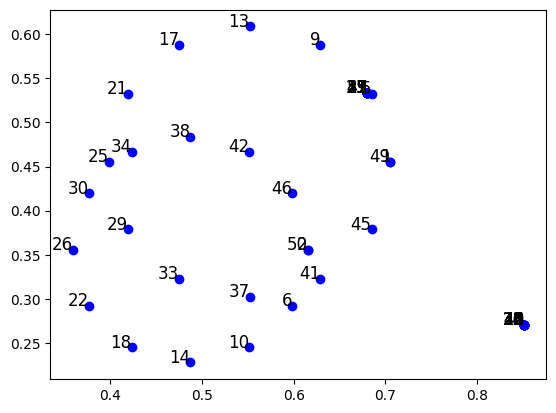

In [16]:
fig, ax = plt.subplots()
moving_dots.plot_dots( X[50005].reshape(-1,2), ax )

In [17]:
# split and save
split_and_save(X,y)